In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [5]:
# если нужно дубликаты столбцов удалить
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [7]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [8]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [9]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [10]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [11]:
data.dropna()

,0,1,2,3


In [12]:
# удалить полностью пустые строки
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
# удалить полностью пустые столбцы
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
# удалить полностью пустые столбцы
data.dropna(how="all", axis=1)

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [15]:
# строки, в которых, как минимум, 2 значения непустые
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [16]:
np.random.standard_normal((7, 3))

array([[ 0.76290232,  0.14824546, -0.69109992],
       [-1.71239413, -0.25460728,  0.94320527],
       [ 1.53176446, -1.09605563, -0.5319855 ],
       [-0.84091365,  0.14569365,  0.7318247 ],
       [-1.31561487,  0.81316567,  1.08544538],
       [ 0.79195981, -0.38820517, -0.15331712],
       [ 0.54438987,  0.64742807,  1.2010127 ]])

In [17]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,0.741351,NaN,NaN
1,-0.728074,NaN,NaN
2,0.210189,NaN,0.753995
3,-0.583056,NaN,0.338265
4,0.329019,0.017760,0.118614
5,0.942754,-0.049671,-0.460738
6,0.508639,-0.417856,0.684433


In [18]:
df.fillna(0)

,0,1,2
0,0.741351,0.000000,0.000000
1,-0.728074,0.000000,0.000000
2,0.210189,0.000000,0.753995
3,-0.583056,0.000000,0.338265
4,0.329019,0.017760,0.118614
5,0.942754,-0.049671,-0.460738
6,0.508639,-0.417856,0.684433


In [19]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.741351,0.500000,0.000000
1,-0.728074,0.500000,0.000000
2,0.210189,0.500000,0.753995
3,-0.583056,0.500000,0.338265
4,0.329019,0.017760,0.118614
5,0.942754,-0.049671,-0.460738
6,0.508639,-0.417856,0.684433


In [20]:
df.fillna(method="bfill")

,0,1,2
0,0.741351,0.017760,0.753995
1,-0.728074,0.017760,0.753995
2,0.210189,0.017760,0.753995
3,-0.583056,0.017760,0.338265
4,0.329019,0.017760,0.118614
5,0.942754,-0.049671,-0.460738
6,0.508639,-0.417856,0.684433


In [21]:
# Если указан method, то limit - макс. кол-во последовательных значений NaN для заполнения в прямом / обратном направлении.
df.fillna(method="bfill", limit=2)

,0,1,2
0,0.741351,NaN,0.753995
1,-0.728074,NaN,0.753995
2,0.210189,0.017760,0.753995
3,-0.583056,0.017760,0.338265
4,0.329019,0.017760,0.118614
5,0.942754,-0.049671,-0.460738
6,0.508639,-0.417856,0.684433


In [22]:
df.fillna(data.mean())

,0,1,2
0,0.741351,6.500000,3.000000
1,-0.728074,6.500000,3.000000
2,0.210189,6.500000,0.753995
3,-0.583056,6.500000,0.338265
4,0.329019,0.017760,0.118614
5,0.942754,-0.049671,-0.460738
6,0.508639,-0.417856,0.684433


In [23]:
df.fillna(data.median())

,0,1,2
0,0.741351,6.500000,3.000000
1,-0.728074,6.500000,3.000000
2,0.210189,6.500000,0.753995
3,-0.583056,6.500000,0.338265
4,0.329019,0.017760,0.118614
5,0.942754,-0.049671,-0.460738
6,0.508639,-0.417856,0.684433


Медиана более устойчива к выбросам

In [24]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

In [25]:
data_all

array([[  1.31845824,  -6.40248659,   5.63147579, ...,   1.83145668,
         -2.90787405, -20.83057515],
       [  2.26282394,   2.44797876,  -8.29431888, ...,   2.02650581,
          9.43792994,  -6.26718378],
       [  6.71206907,  13.90510359,  -4.97747658, ...,  -1.05222162,
         -1.0991085 ,   6.4074182 ],
       ...,
       [  0.82602583,  -3.97126227,  -3.57325843, ...,  15.69524896,
         14.4137049 ,  -3.52082636],
       [ 13.18903953,  12.02605727,  23.11660358, ...,  -0.30174928,
        -12.86472992,  -7.71649916],
       [  6.54323731,   3.15725622,  -1.89048571, ...,  -0.79801387,
         14.47297085,  -0.86274859]])

<AxesSubplot:>

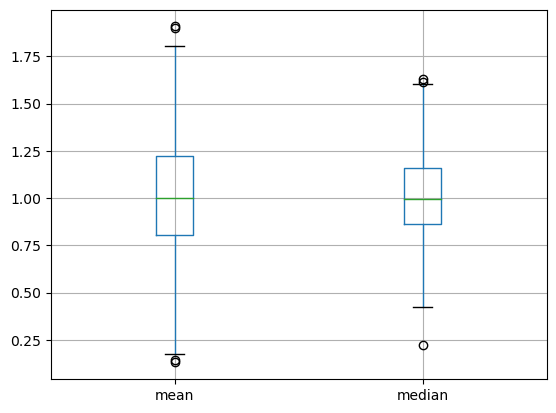

In [26]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Диаграмма размаха и усы у медианы меньше, чем у среднего.

Создание дополнительного признака

In [27]:
df["2 is nan"] = df[2].isna().astype('int') # или .astype(np.int32)
df

,0,1,2,2 is nan
0,0.741351,NaN,NaN,1
1,-0.728074,NaN,NaN,1
2,0.210189,NaN,0.753995,0
3,-0.583056,NaN,0.338265,0
4,0.329019,0.017760,0.118614,0
5,0.942754,-0.049671,-0.460738,0
6,0.508639,-0.417856,0.684433,0


Замена значений

In [28]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [29]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [30]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [31]:
data == "male"

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11    False
12    False
13    False
14    False
dtype: bool

In [32]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [33]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [34]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [35]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [36]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [40]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

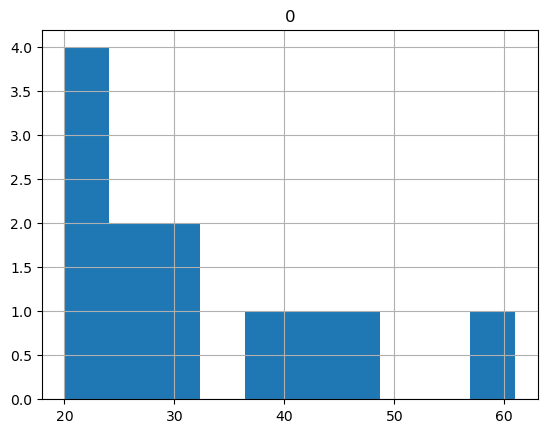

In [41]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [42]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [43]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [45]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\User\AppData\Local\Temp\ipykernel_5724\1753499592.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist= False, kde= True)


<AxesSubplot:ylabel='Density'>

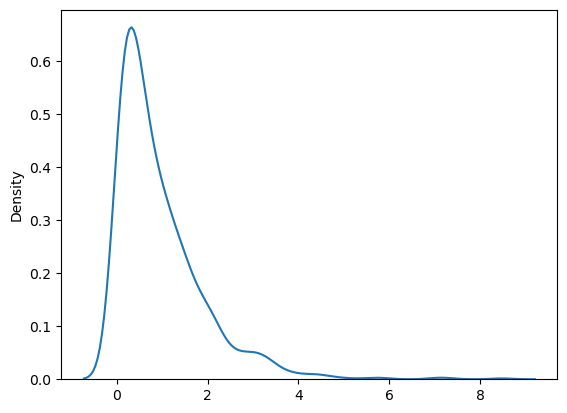

In [46]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\User\AppData\Local\Temp\ipykernel_5724\1776627611.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False, kde=True)


<AxesSubplot:ylabel='Density'>

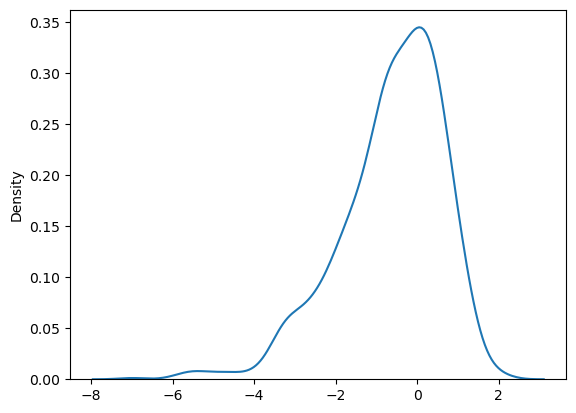

In [47]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\User\AppData\Local\Temp\ipykernel_5724\2198520673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False , kde=True)


<AxesSubplot:ylabel='Density'>

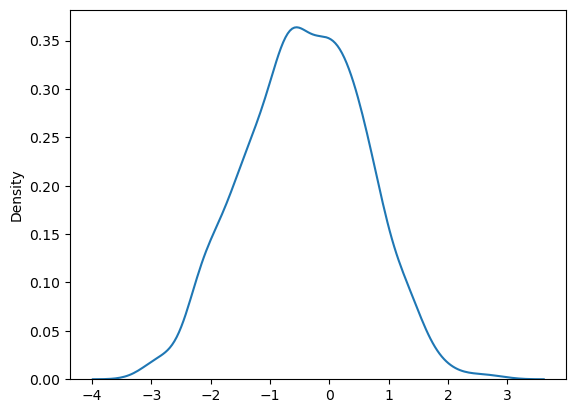

In [48]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

In [49]:
best_lambda

0.2587953621572706

# Домашнее задание

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [51]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

## Baseline

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [54]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
reg = LinearRegression().fit(train_X, train_y)

In [56]:
reg.score(train_X, train_y)

0.4555406785040049

In [57]:
mean_squared_error(reg.predict(train_X), train_y)

29840.121250865293

In [58]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [59]:
scores

{'fit_time': array([0.02398515, 0.01799107, 0.02798176]),
 'score_time': array([0.00399828, 0.00399756, 0.0039978 ]),
 'test_score': array([-29836.8590711 , -29618.75539266, -30344.6536926 ])}

In [60]:
mean_squared_error(reg.predict(test_X), test_y)

31021.024399854425

Такая же реализация, но со стандартизацией переменных (результат тот же)

In [61]:
x = df.drop(["target"], axis=1)
y = df[["target"]]

In [62]:
#разделяем данные на обучающую и валидационную выборку с random_state=42
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [63]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

In [64]:
# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[[ 1.70987213e+00 -1.86492635e-02  1.71087766e+01  2.84640278e+01
  -2.25044695e+01 -4.11015733e+00 -1.67016901e+00  1.00891197e+02
  -1.40267172e+01  3.71953243e+01 -7.32696730e+00 -3.89278127e+01
   2.49902769e+01  7.04489136e+00 -2.00119213e+01  4.51849256e+00
   6.39035733e-01  7.99381115e+00  2.42344468e+00  2.21373111e+01
  -3.03210018e+01 -1.76316799e+01  9.58882976e+00 -4.69930774e+00
   5.19173683e+01  5.29675490e+01 -9.03519466e+00  1.35245459e+01
  -6.06911928e-02  8.67732162e+00 -1.78861834e+00]] [2659.80976047]


In [65]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)

In [66]:
# делаем прогнозы
predictions = model.predict(x_test_st)
predictions

array([[2357.49541933],
       [2672.18557119],
       [2597.00749612],
       ...,
       [2495.96837264],
       [2556.29173903],
       [2490.33445521]])

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [68]:
# проверяем r2 для фактических значений обучающей выборки и предсказанных значений обучающей выборки
model.score(x_train_st, y_train)

0.4555406785040046

In [69]:
# проверяем r2 для фактических значений тестовой выборки и предсказанных значений тестовой выборки
r2_score(y_test, predictions)

0.4646243987792352

In [70]:
# Среднеквадратичная ошибка предсказанных значений обучающей выборки
mean_squared_error(model.predict(x_train_st), y_train)

29840.121250865308

In [71]:
# Среднеквадратичная ошибка предсказанных значений тестовой выборки
mean_squared_error(y_test, predictions)

31021.02439985448

Попробуем построить линейную модель с Ridge и Lasso регуляризацией

In [72]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV

In [73]:
# создадим модель линейной регрессии
model = Ridge()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[[ 1.70992031e+00 -1.87979716e-02  1.71023513e+01  2.83050804e+01
  -2.25023652e+01 -4.10985732e+00 -1.66373271e+00  1.00882328e+02
  -1.40247408e+01  3.71899390e+01 -7.32859285e+00 -3.89253821e+01
   2.49890777e+01  7.04044967e+00 -2.00086895e+01  4.51577051e+00
   6.38852830e-01  7.99333685e+00  2.42325922e+00  2.21373905e+01
  -3.01575035e+01 -1.76304093e+01  9.58994343e+00 -4.69855318e+00
   5.19164393e+01  5.29662698e+01 -9.03424100e+00  1.35249524e+01
  -6.08719883e-02  8.67759069e+00 -1.78844784e+00]] [2659.80976047]


In [74]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)

In [75]:
# делаем прогнозы
predictions = model.predict(x_test_st)
predictions

array([[2357.45385765],
       [2672.16983972],
       [2597.01058181],
       ...,
       [2495.96652035],
       [2556.29722211],
       [2490.347691  ]])

In [76]:
# проверяем r2
r2_score(y_test, predictions)

0.46462406912285303

In [77]:

# создадим модель линейной регрессии
model = Lasso()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[  0.72535279  -0.          15.37602181   0.26416815 -21.01060458
  -3.02556009   0.          98.5472326  -11.31270784  33.99740115
  -7.56032644 -36.73592971  23.64539713   4.30283738 -17.38238276
   3.32901556   0.           6.30688611   1.69700642  20.76682909
   0.         -16.14994154   8.86922158  -3.50496604  51.74345387
  51.70863197  -9.00977565  12.95274605  -0.           8.02520015
  -0.5583657 ] [2659.80976047]


In [78]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)

In [79]:
# делаем прогнозы
predictions = model.predict(x_test_st)
predictions

array([2354.31448314, 2666.70996605, 2601.1488609 , ..., 2496.33349719,
       2561.52254646, 2501.21297243])

In [80]:
# проверяем r2
r2_score(y_test, predictions)

0.4637358932131177

Коэффициент детерминации практически не изменился по сравнению с линейной регрессией без регуляризации.

Посмотрим точечные диаграммы (диаграммы рассеивания)

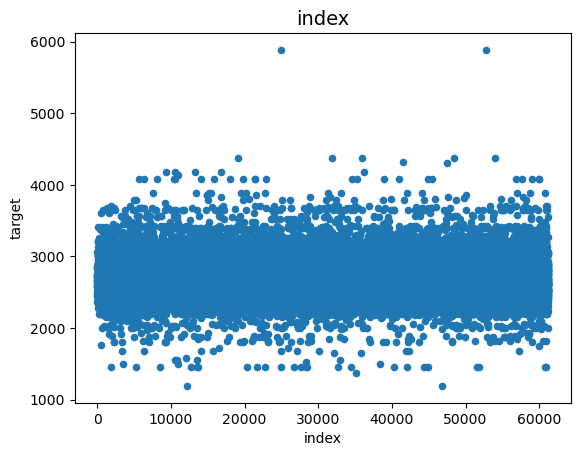

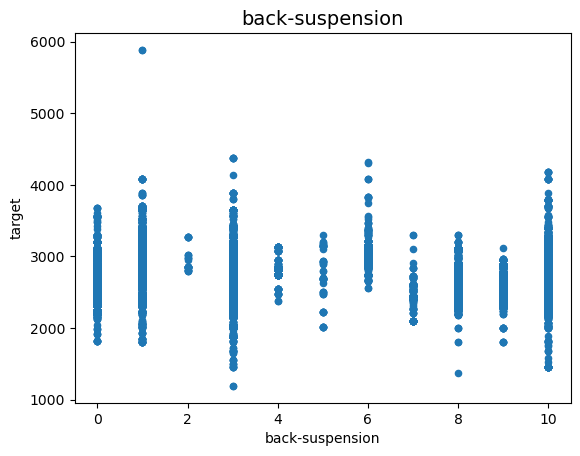

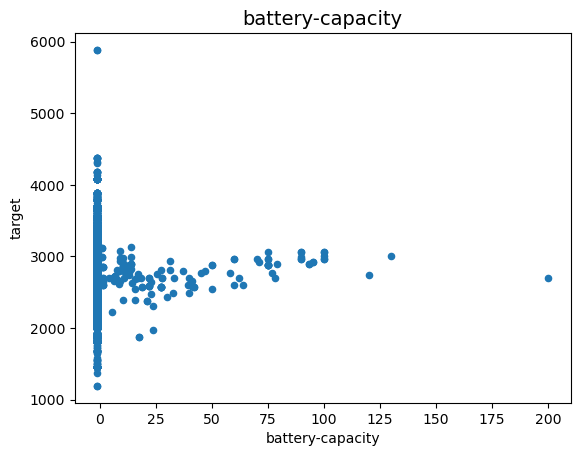

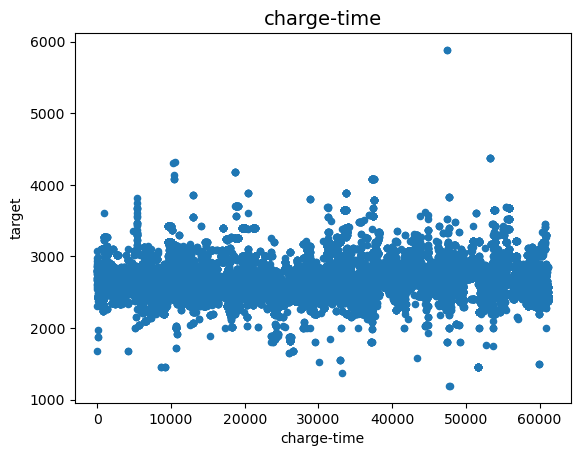

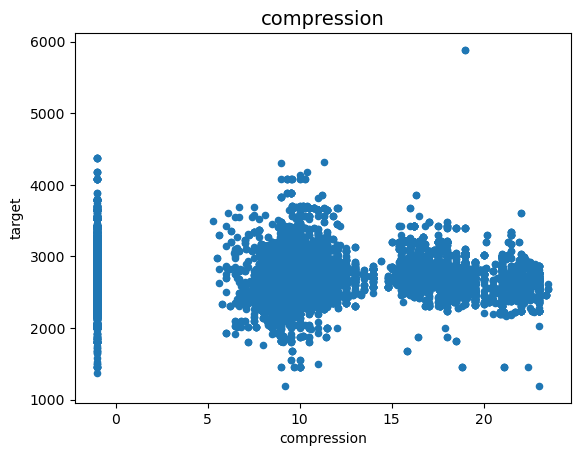

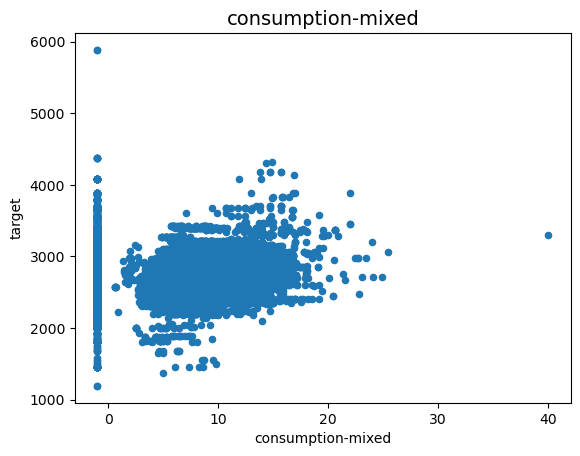

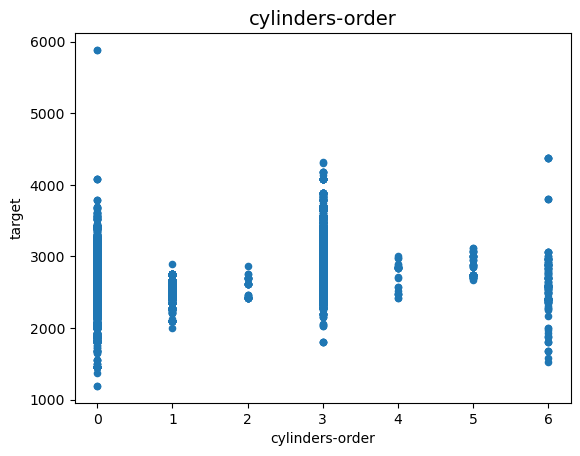

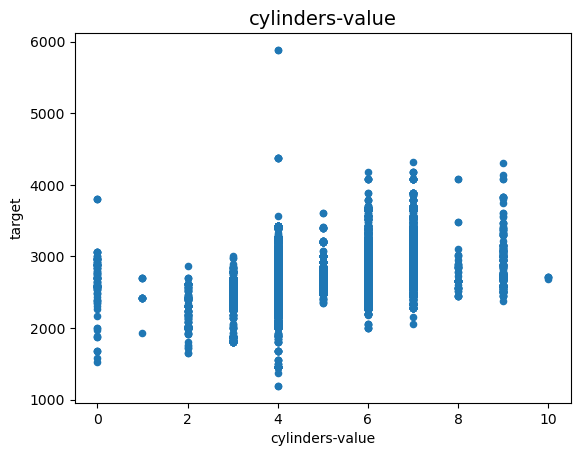

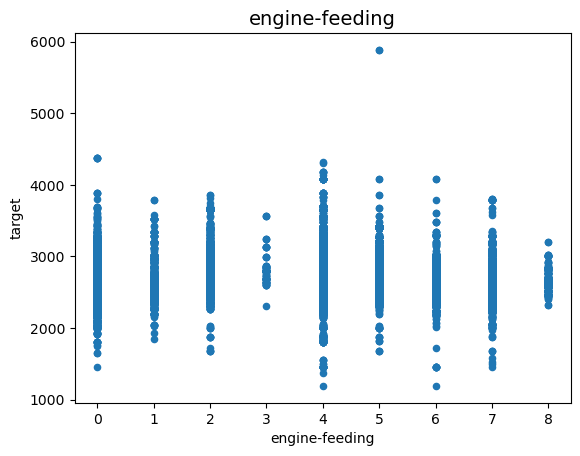

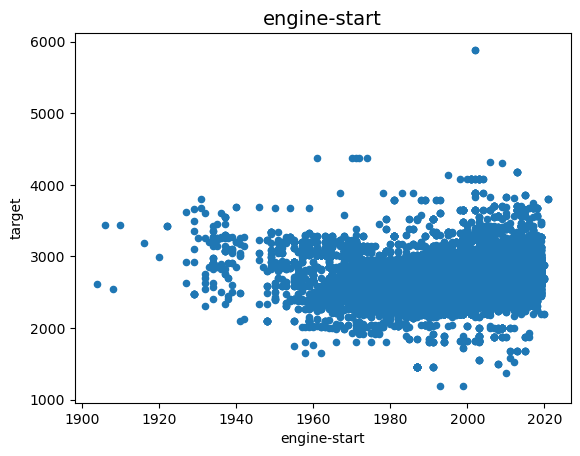

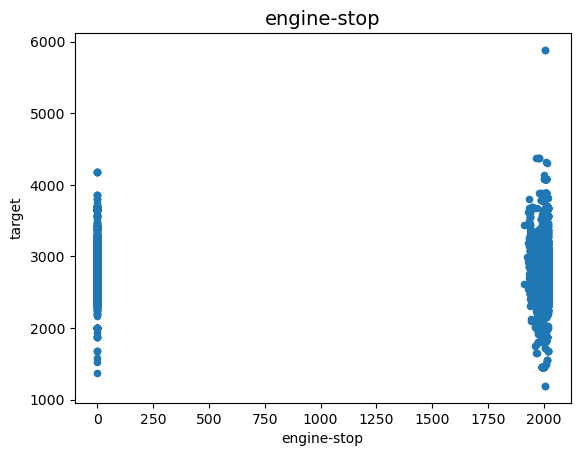

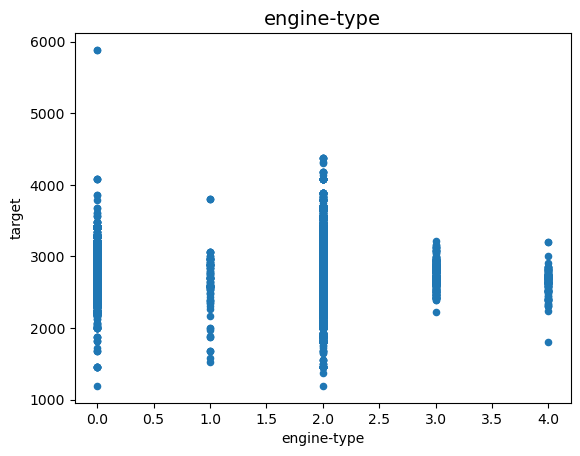

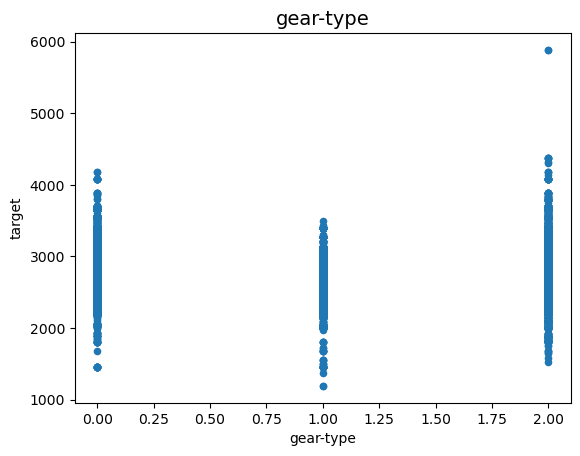

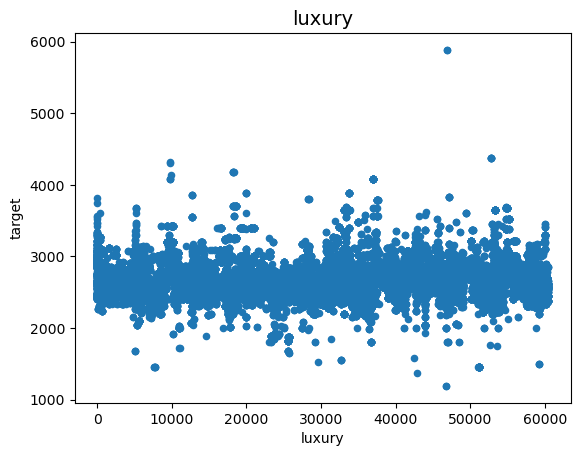

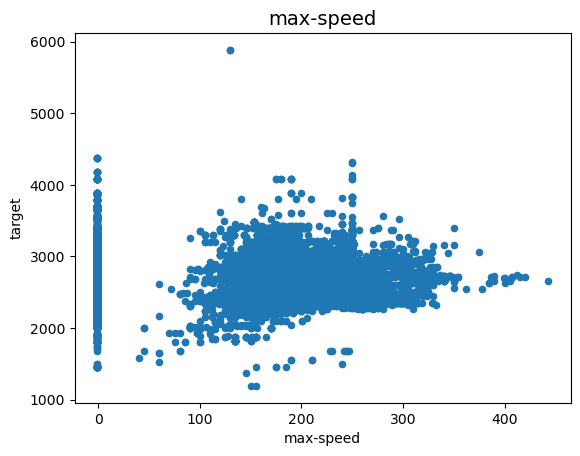

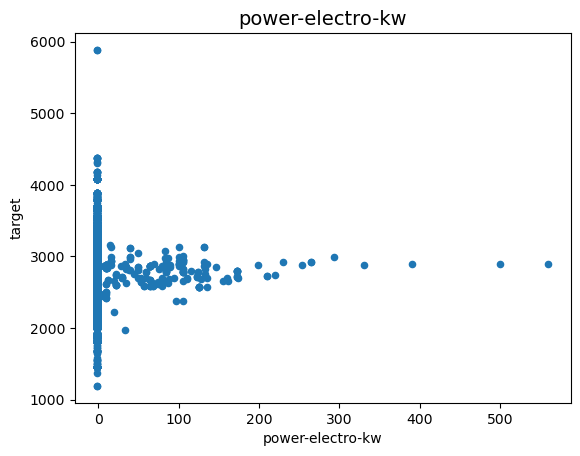

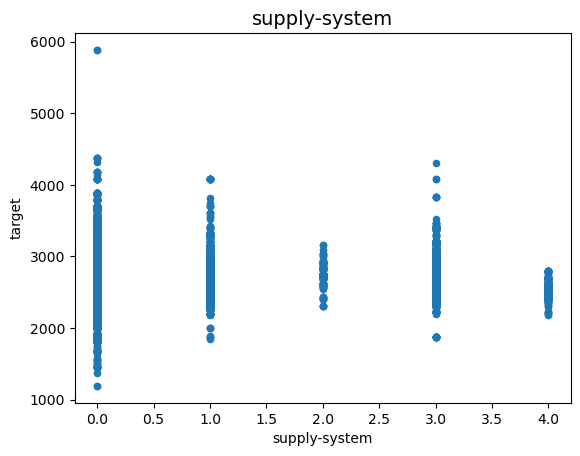

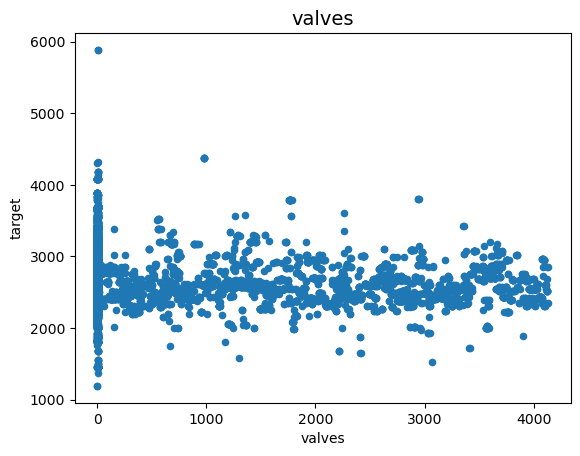

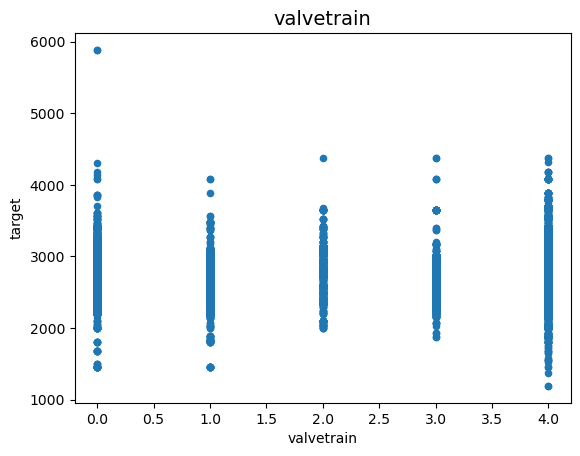

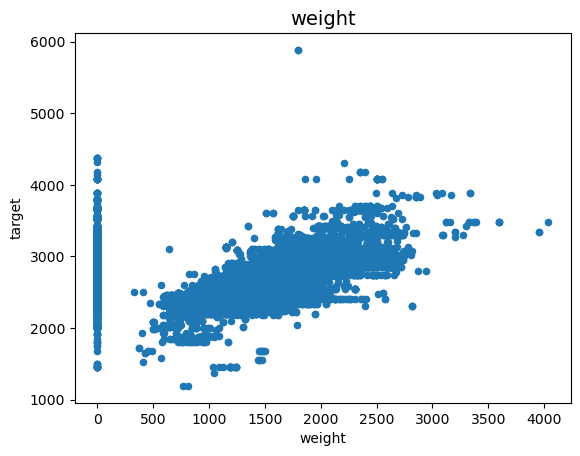

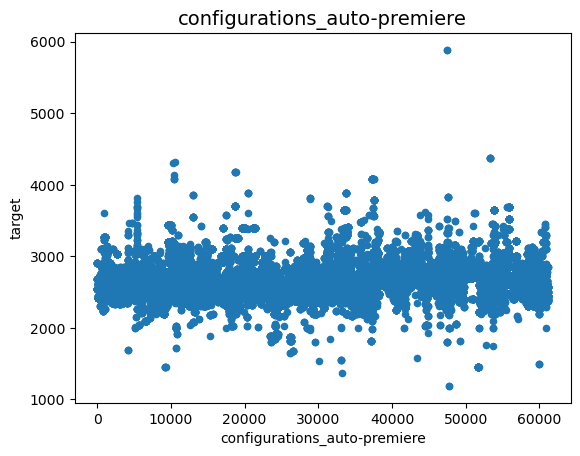

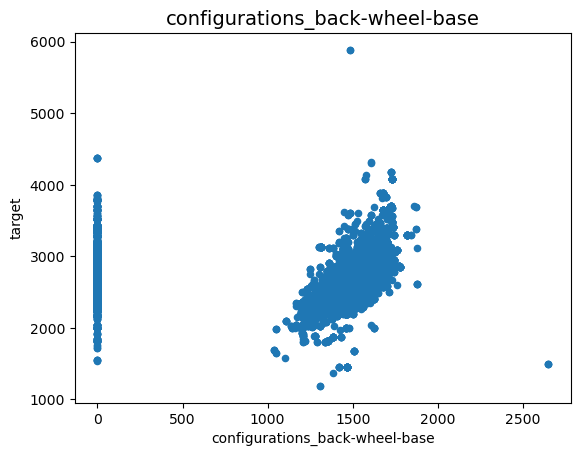

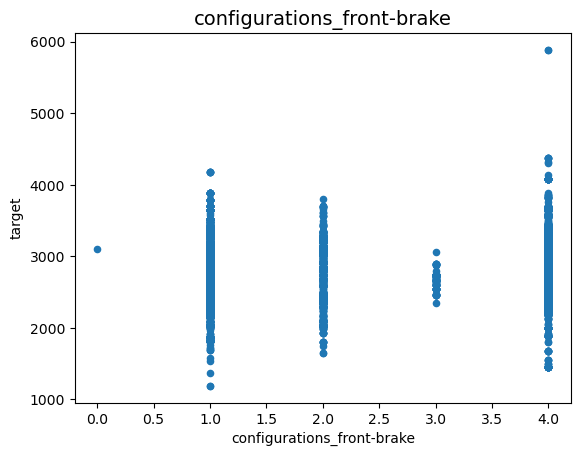

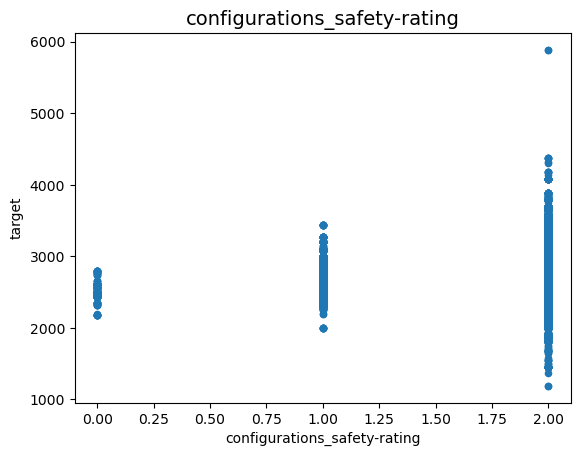

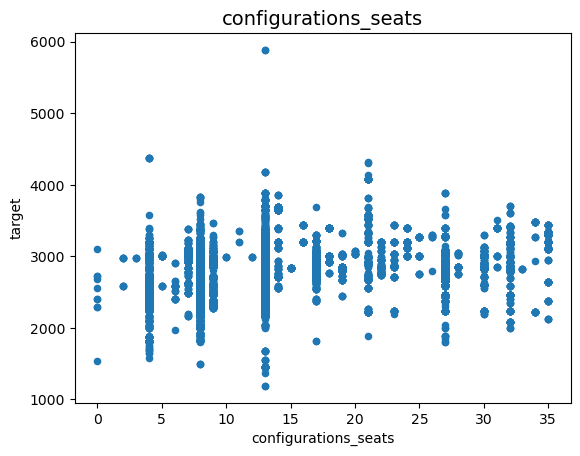

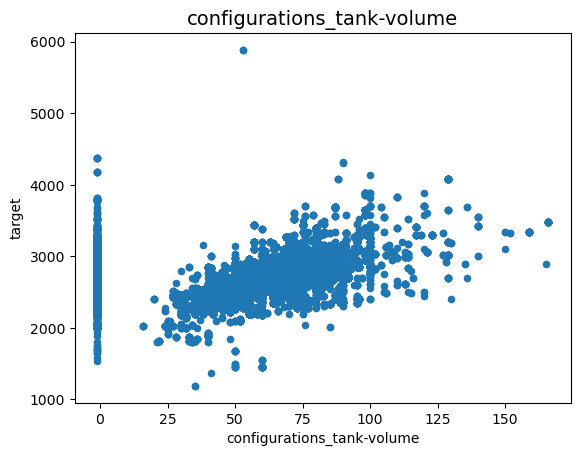

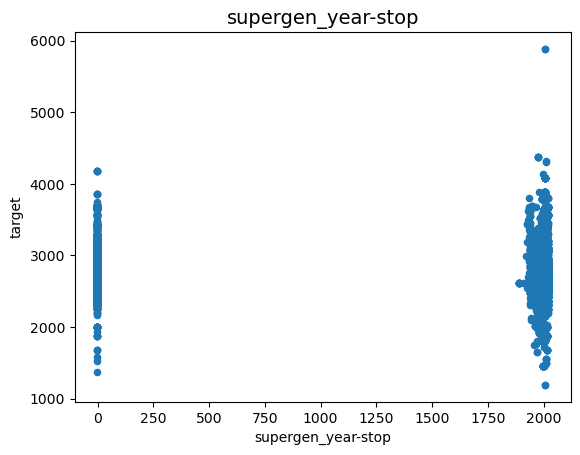

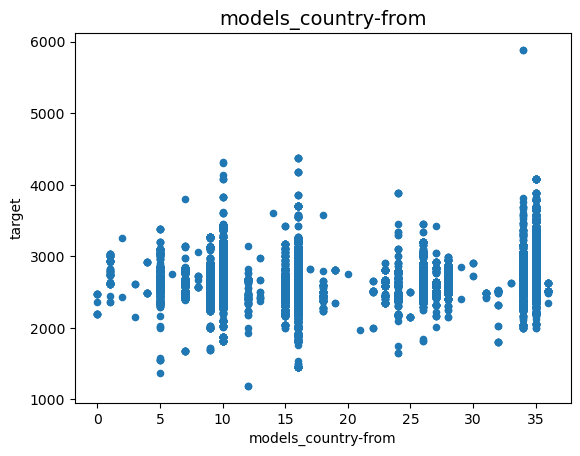

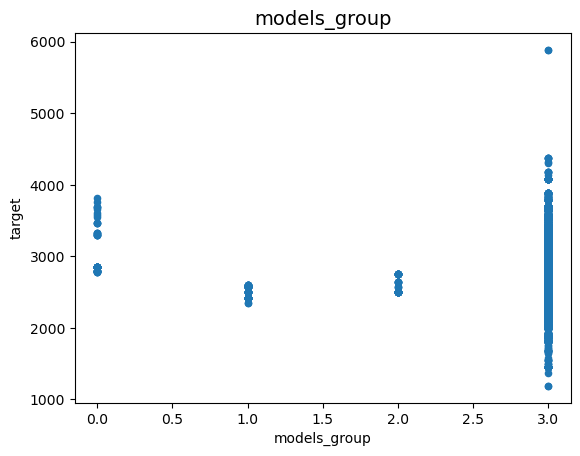

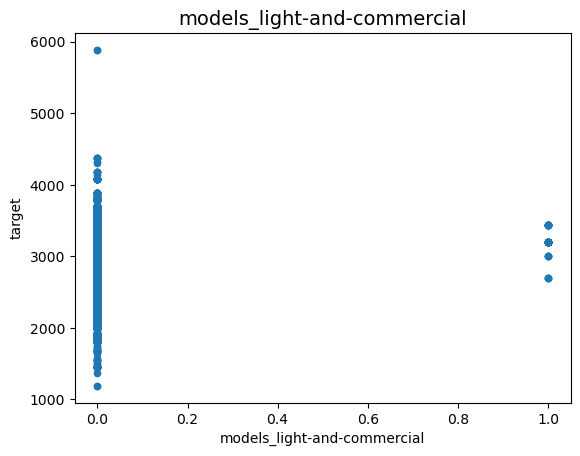

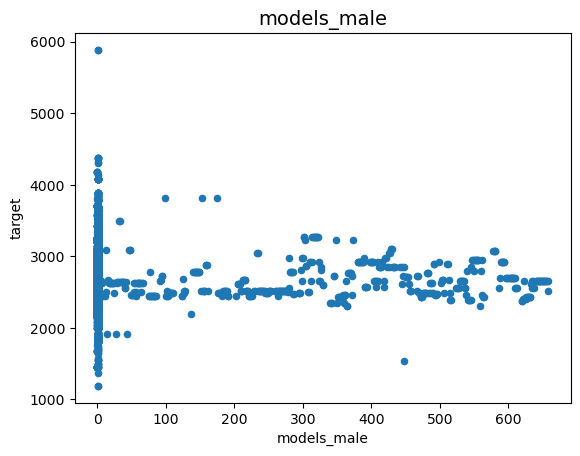

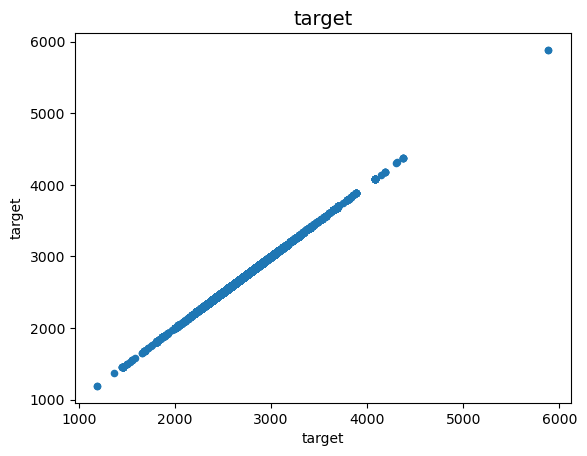

In [81]:
for element in df.columns:
    df.plot(kind='scatter', x=element, y='target')
    plt.title(element, fontsize=14)
    plt.show()

Видно, что по некоторым зарактеристикам автомобилей есть какие-то "столбики" в районе 0.

In [82]:
df[df<0].sum()

index                                 0.0
back-suspension                       0.0
battery-capacity                 -43093.0
charge-time                           0.0
compression                       -9320.0
consumption-mixed                -17271.0
cylinders-order                       0.0
cylinders-value                       0.0
engine-feeding                        0.0
engine-start                          0.0
engine-stop                           0.0
engine-type                           0.0
gear-type                             0.0
luxury                                0.0
max-speed                        -14885.0
power-electro-kw                 -43032.0
supply-system                         0.0
valves                                0.0
valvetrain                            0.0
weight                            -9399.0
configurations_auto-premiere          0.0
configurations_back-wheel-base    -3067.0
configurations_front-brake            0.0
configurations_safety-rating      

In [83]:
for element in df[df<0].columns:
    print(element)
    print(df[df<0][element].value_counts())

index
Series([], Name: index, dtype: int64)
back-suspension
Series([], Name: back-suspension, dtype: int64)
battery-capacity
-1.0    43093
Name: battery-capacity, dtype: int64
charge-time
Series([], Name: charge-time, dtype: int64)
compression
-1.0    9320
Name: compression, dtype: int64
consumption-mixed
-1.0    17271
Name: consumption-mixed, dtype: int64
cylinders-order
Series([], Name: cylinders-order, dtype: int64)
cylinders-value
Series([], Name: cylinders-value, dtype: int64)
engine-feeding
Series([], Name: engine-feeding, dtype: int64)
engine-start
Series([], Name: engine-start, dtype: int64)
engine-stop
Series([], Name: engine-stop, dtype: int64)
engine-type
Series([], Name: engine-type, dtype: int64)
gear-type
Series([], Name: gear-type, dtype: int64)
luxury
Series([], Name: luxury, dtype: int64)
max-speed
-1.0    14885
Name: max-speed, dtype: int64
power-electro-kw
-1.0    43032
Name: power-electro-kw, dtype: int64
supply-system
Series([], Name: supply-system, dtype: int64)
v

То есть в некоторых столбцах есть значения -1, что является не естественным (характеритстика автомобиля (максимальная скорость, вес и т.д.) не может принимать отрицательное значение)

Однако мы не можем удалить все строки, в которых встречается -1, т.к. таких строк будет очень много (весь датасет)

Вернёмся к этому вопросу чуть ниже

Матрица парных линейных коэффицментов корреляции.

In [84]:
df.corr().style.background_gradient(cmap='YlOrRd')

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,gear-type,luxury,max-speed,power-electro-kw,supply-system,valves,valvetrain,weight,configurations_auto-premiere,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
index,1.000000,0.003898,-0.001457,-0.005556,-0.000464,-0.000202,-0.002258,-0.001537,0.001591,-0.000337,0.000014,-0.001997,-0.001389,-0.002904,0.002346,0.007510,-0.007180,0.006258,0.002195,-0.001538,-0.005759,0.004761,0.004611,-0.004249,0.000466,-0.001526,0.000074,-0.006934,0.006834,0.005661,-0.001654,0.002701
back-suspension,0.003898,1.000000,0.008851,-0.193989,-0.105450,-0.137078,-0.119261,-0.160858,0.061687,-0.029760,-0.026592,0.023575,0.004268,-0.188800,-0.109077,-0.003078,-0.033765,0.132197,0.027428,-0.266417,-0.194854,-0.130673,-0.102584,-0.031057,-0.042323,-0.323143,-0.021228,-0.116755,-0.019685,-0.016126,0.043355,-0.159912
battery-capacity,-0.001457,0.008851,1.000000,-0.031922,-0.057803,-0.043129,0.158632,-0.145231,0.065207,0.056365,-0.103095,-0.013112,-0.022934,-0.002355,0.029325,0.410707,-0.021193,0.124941,0.043971,0.007378,-0.003152,-0.030135,0.022147,-0.008994,0.006409,-0.071311,-0.102719,0.020826,0.002595,-0.001942,0.024069,0.025703
charge-time,-0.005556,-0.193989,-0.031922,1.000000,0.018219,0.046768,0.107905,0.121424,-0.007057,0.089422,-0.033840,0.025986,0.008855,0.949215,0.048685,-0.022554,0.016368,-0.109030,0.006639,0.078015,0.994027,0.004035,0.080451,-0.012119,-0.023785,0.089222,-0.032347,0.207838,-0.027029,-0.048904,-0.030769,0.110034
compression,-0.000464,-0.105450,-0.057803,0.018219,1.000000,0.130448,-0.084557,-0.033044,0.167183,0.252255,0.008496,-0.423809,-0.109125,0.005815,0.209424,-0.016972,0.163090,-0.310940,-0.174747,0.259621,0.015266,0.261163,0.195110,-0.111495,0.054701,0.266837,0.005798,-0.070765,0.000219,0.006494,-0.003346,0.023138
consumption-mixed,-0.000202,-0.137078,-0.043129,0.046768,0.130448,1.000000,0.079701,0.125600,-0.004348,0.316506,-0.060000,0.027914,-0.101855,0.018968,0.494636,-0.020322,0.175339,-0.196455,-0.147662,0.467731,0.043494,0.221497,0.265524,-0.080412,0.022038,0.307298,-0.064671,-0.113843,-0.033141,0.024245,-0.014838,0.118195
cylinders-order,-0.002258,-0.119261,0.158632,0.107905,-0.084557,0.079701,1.000000,0.720077,-0.074468,-0.052457,0.007639,0.161144,0.054295,0.078044,0.075703,0.070138,-0.045314,0.026420,0.077159,0.199547,0.111240,-0.004114,0.033961,0.102481,-0.014392,0.224373,0.008260,0.232579,-0.023909,-0.011807,0.000143,0.376272
cylinders-value,-0.001537,-0.160858,-0.145231,0.121424,-0.033044,0.125600,0.720077,1.000000,-0.101289,-0.161831,0.084740,0.132648,0.169542,0.077473,0.118216,-0.053368,-0.002668,-0.026653,0.061603,0.220476,0.112786,0.029396,0.033480,0.125640,-0.028327,0.302997,0.085953,0.217498,-0.044688,-0.014459,-0.017780,0.472177
engine-feeding,0.001591,0.061687,0.065207,-0.007057,0.167183,-0.004348,-0.074468,-0.101289,1.000000,0.232445,0.027275,-0.472376,-0.128977,0.004969,0.050093,0.007754,0.073064,0.191078,-0.002288,0.016811,-0.004513,0.060790,0.127065,-0.057243,0.076379,0.042067,0.031153,-0.110842,0.012638,0.026376,-0.026445,0.012235
engine-start,-0.000337,-0.029760,0.056365,0.089422,0.252255,0.316506,-0.052457,-0.161831,0.232445,1.000000,-0.383053,-0.195802,-0.306258,0.058362,0.427079,0.062919,0.157331,-0.240955,-0.287556,0.420975,0.091348,0.337773,0.504745,-0.229782,0.065405,0.327209,-0.399186,-0.136376,-0.026436,0.038331,0.028909,0.150944


Смотрим, с чем теснее всего линейная связь с target

In [85]:
df.corr()[['target']].style.background_gradient(cmap='YlOrRd')

,target
index,0.002701
back-suspension,-0.159912
battery-capacity,0.025703
charge-time,0.110034
compression,0.023138
consumption-mixed,0.118195
cylinders-order,0.376272
cylinders-value,0.472177
engine-feeding,0.012235
engine-start,0.150944


Посмотри также на коэффициенты корреляции по Спирмену, который более устойчив к выбросам.

In [86]:
df.corr(method='spearman')[['target']].style.background_gradient(cmap='YlOrRd')

,target
index,0.002406
back-suspension,-0.182254
battery-capacity,0.029654
charge-time,0.137006
compression,0.103935
consumption-mixed,0.166239
cylinders-order,0.349834
cylinders-value,0.492853
engine-feeding,0.060454
engine-start,0.269032


Предварительно исходя из матрицы коэффициентов корреляции выбираем в качестве факторов 'cylinders-order', 'cylinders-value', 'engine-start', 'max-speed', 'weight',
        'configurations_back-wheel-base', 'configurations_front-brake', 'configurations_seats',
       'configurations_tank-volume'

Однако проверим (также по матрице коэффициентов корреляции) эти факторы на отсутствие мультиколлинеарности.

In [87]:
df[['cylinders-order', 'cylinders-value', 'engine-start', 'max-speed', 'weight',
        'configurations_back-wheel-base', 'configurations_front-brake', 'configurations_seats',
       'configurations_tank-volume']].corr().style.background_gradient(cmap='YlOrRd')

,cylinders-order,cylinders-value,engine-start,max-speed,weight,configurations_back-wheel-base,configurations_front-brake,configurations_seats,configurations_tank-volume
cylinders-order,1.000000,0.720077,-0.052457,0.075703,0.199547,-0.004114,0.033961,-0.014392,0.224373
cylinders-value,0.720077,1.000000,-0.161831,0.118216,0.220476,0.029396,0.033480,-0.028327,0.302997
engine-start,-0.052457,-0.161831,1.000000,0.427079,0.420975,0.337773,0.504745,0.065405,0.327209
max-speed,0.075703,0.118216,0.427079,1.000000,0.509044,0.270799,0.278240,-0.069876,0.320531
weight,0.199547,0.220476,0.420975,0.509044,1.000000,0.311422,0.319780,0.180505,0.546153
configurations_back-wheel-base,-0.004114,0.029396,0.337773,0.270799,0.311422,1.000000,0.263095,0.001493,0.425377
configurations_front-brake,0.033961,0.033480,0.504745,0.278240,0.319780,0.263095,1.000000,0.055093,0.330112
configurations_seats,-0.014392,-0.028327,0.065405,-0.069876,0.180505,0.001493,0.055093,1.000000,0.185502
configurations_tank-volume,0.224373,0.302997,0.327209,0.320531,0.546153,0.425377,0.330112,0.185502,1.000000


Видно, что между некоторыми факторами имеется мультиколлинеарность, что может привести к снижению точности модели. Поэтому оставляем в качестве факторов только 'cylinders-value',
'configurations_back-wheel-base',
'configurations_seats'

In [88]:
factors = ['cylinders-value',
'configurations_back-wheel-base',
'configurations_seats']

В столбце configurations_back-wheel-base как раз содержится более 3000 значений -1. Кроме того, есть ещё несколько влиятельных точек. Оба этих факта могли исказить модель. Поэтому удалим экстемальные и неестественные значения, которые выходят за усы ящика с усами и называются выбросами.

In [89]:
def ejection(col):
    q75 = np.percentile(df[col], 75) # 75-й перцентиль (3-й квартиль)
    q25 = np.percentile(df[col], 25) # 25-й перцентиль (1-й квартиль)
    iqr = q75 - q25 # межквартильный размах IQR
    ejection_h = q75 + iqr * 1.5 # значение на верхней (правой) границе уса диаграммы размаха (box plot)
    ejection_l = q25 - iqr * 1.5 # значение на нижней (левой) границе уса диаграммы размаха (box plot)
    ejection_count = df[col][(df[col] > ejection_h) | (df[col] < ejection_l)].count() # число выбросов
    ejection_perc = (ejection_count / len(df)) * 100 # процент выбросов от всего датасета
    return(ejection_h, ejection_l, ejection_count, ejection_perc)

In [90]:
df = df[(df['configurations_back-wheel-base'] < ejection('configurations_back-wheel-base')[0]) & (df['configurations_back-wheel-base'] > ejection('configurations_back-wheel-base')[1])]
df = df.reset_index(drop=True)

Посмотрим на точечные диаграммы теперь.

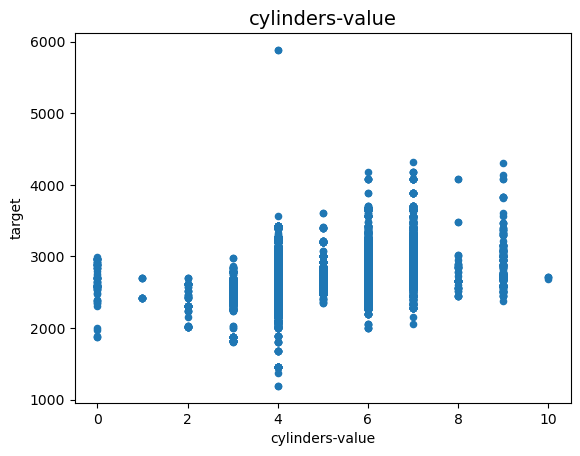

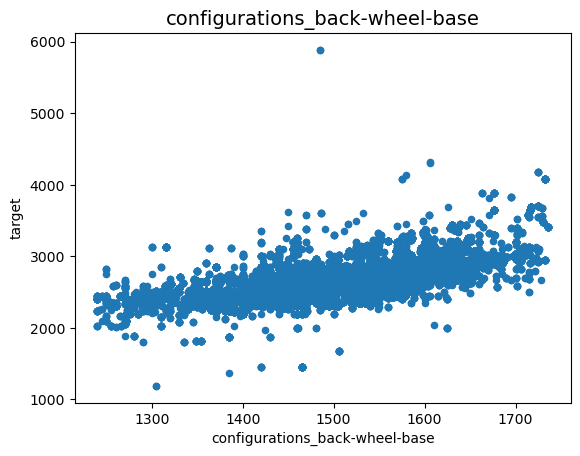

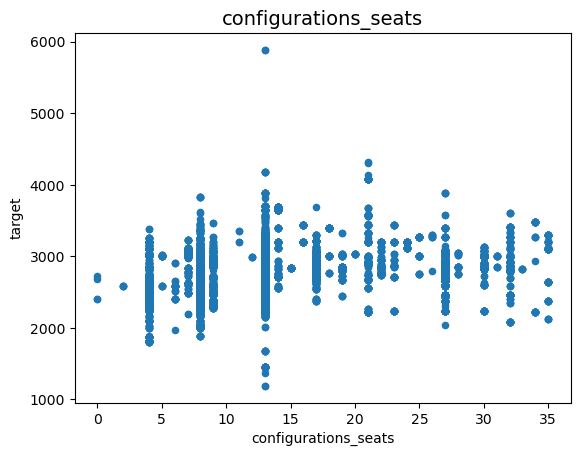

In [91]:
for element in factors:
    df.plot(kind='scatter', x=element, y='target')
    plt.title(element, fontsize=14)
    plt.show()

In [92]:
y = df['target']
x = df[['cylinders-value',
'configurations_back-wheel-base',
'configurations_seats']]

In [93]:
#разделяем данные на обучающую и валидационную выборку с random_state=42
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [94]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

In [95]:
# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[ 53.03067369 120.28751757  42.51360974] 2657.750573200526


In [96]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)

In [97]:
# делаем прогнозы
predictions = model.predict(x_test_st)
predictions

array([2481.1870488 , 2864.07810745, 2610.340207  , ..., 2721.45622888,
       2655.18322799, 2569.48338022])

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [99]:
# проверяем r2 для фактических значений обучающей выборки и предсказанных значений обучающей выборки
model.score(x_train_st, y_train)

0.5380064731807613

R2 стал выше по сравнению с изначальной моделью

In [100]:
# проверяем r2 для фактических значений тестовой выборки и предсказанных значений тестовой выборки
r2_score(y_test, predictions)

0.54719963995756

In [101]:
# Среднеквадратичная ошибка предсказанных значений обучающей выборки
mean_squared_error(model.predict(x_train_st), y_train)

22327.217378196216

Среднеквадратичная ошибка предсказанных значений обучающей выборки стала меньше (это тоже хорошо)

In [102]:
# Среднеквадратичная ошибка предсказанных значений тестовой выборки
mean_squared_error(y_test, predictions)

21705.307472787987

Примечание: можно было бы включить в модель другие факторы, которые не имеют мультикорллинеарности с имеющимися у нас в модели факторами, но которые практически не коррелируют (линейная корреляция) с результирующей переменной target, но в таком случае параметры модели при данных линейно некоррелируемых с target факторах оказались бы статистически незначимы (фактическое значение t-критерия оказалось бы меньше табличного t-критерия). Хотя при этом R2 оказался бы выше (т.к. его значение всегда может только расти (не убывать) при увеличении кол-ва факторов (это недостаток R2, поэтому для сравнения моделей с разным количеством факторов используют R2-скорректированный)).